In [43]:
!pip install tensorflow_addons

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import re
from sklearn import metrics
import tensorflow as tf 
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

In [45]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/DATA586/anomaly-dection-project/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/DATA586/anomaly-dection-project


In [46]:
df = pd.read_csv('BGL_cleaned.csv')

In [48]:
anomaly = [0]*len(df['info'])
normal = [0]*len(df['info'])

for idx, i in enumerate(df['label']):
    if i == 'Anomaly':
      anomaly[idx] = 1
    else:
      normal[idx] = 1

df['anomaly'] = anomaly
df['normal'] = normal

del(anomaly)
del(normal)

In [49]:
#split 20% of train as validation set
X = df['info']
y = df.iloc[:,7:]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=123)

In [50]:
NUM_WORDS = 5000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',lower=True)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
      

In [51]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_validation = tokenizer.texts_to_sequences(X_validation)

In [52]:
X_train = pad_sequences(sequences_train,maxlen=50)
X_validation = pad_sequences(sequences_validation,maxlen=X_train.shape[1])


y_train = np.asarray(y_train)
y_validation = np.asarray(y_validation)

In [53]:
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(5000, embedding_vecor_length, input_length=X_train.shape[1]))
model.add(LSTM(256))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [54]:
model.compile(optimizer=Adam(0.01), 
              metrics=['accuracy', 'Precision', 'Recall',tfa.metrics.F1Score(num_classes=2,average='macro')], 
              loss = 'binary_crossentropy')
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation), batch_size=200)

Epoch 1/10
190/190 [==============================] - 182s 947ms/step - loss: 0.0219 - accuracy: 0.9933 - precision: 0.9899 - recall: 0.9943 - f1_score: 0.9744 - val_loss: 0.0014 - val_accuracy: 0.9996 - val_precision: 0.9996 - val_recall: 0.9996 - val_f1_score: 0.9984
Epoch 2/10
190/190 [==============================] - 178s 939ms/step - loss: 0.0016 - accuracy: 0.9995 - precision: 0.9996 - recall: 0.9994 - f1_score: 0.9982 - val_loss: 6.3061e-04 - val_accuracy: 0.9998 - val_precision: 1.0000 - val_recall: 0.9996 - val_f1_score: 0.9992
Epoch 3/10
190/190 [==============================] - 185s 975ms/step - loss: 3.0960e-04 - accuracy: 0.9999 - precision: 0.9999 - recall: 0.9999 - f1_score: 0.9998 - val_loss: 2.0379e-05 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_f1_score: 1.0000
Epoch 4/10
190/190 [==============================] - 173s 909ms/step - loss: 9.5356e-06 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - f1_score: 1.0000 - val_loss: 3.

In [55]:
test_loss, test_acc, test_preci, test_recall, test_f1 = model.evaluate(X_validation, y_validation, verbose = 2)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

297/297 - 20s - loss: 3.3722e-07 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - f1_score: 1.0000 - 20s/epoch - 67ms/step
Test Loss: 3.3721880754455924e-07
Test Accuracy: 1.0


In [56]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.02297383341538506)

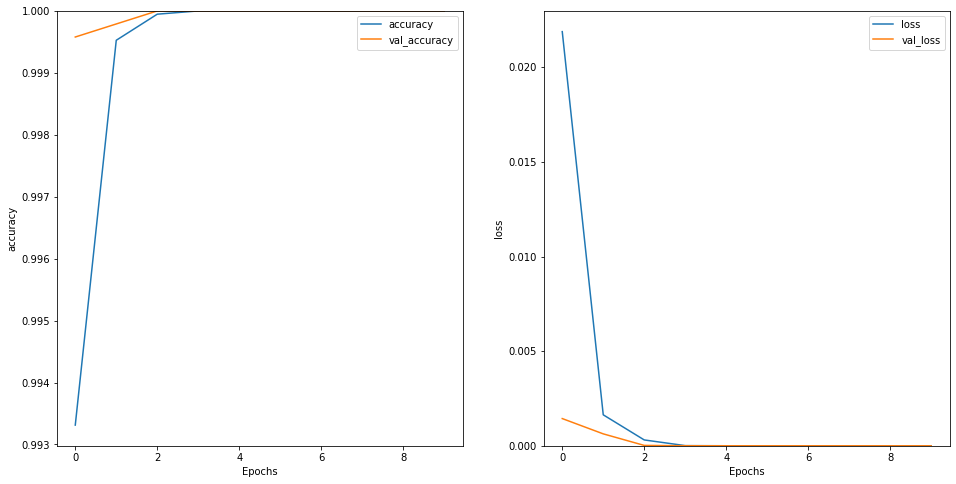

In [57]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)